In [9]:
import pandas as pd
import os
from os.path import join, isdir
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [50]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [59]:
models = '../models'
optims = []
def get_data(model_dir):
    try:
        data  = pd.read_csv(join(model_dir, 'epoch_loss.csv'))
        optim = pd.read_json(join(model_dir, 'optimizer.json'), typ='series')
        optims.append(optim)
    except:
        return None
    data['model_dir'] = model_dir
    data['optimizer']     = optim['name']
    data['learning_rate'] = optim['learning_rate']
    return data

paths = [join(models, path) for path in os.listdir(models)]
jobs = filter(isdir, paths)
df = pd.concat(map(get_data, jobs))
df['job_id'] = df['model_dir'].str.extract(r'.*/(.*)_.*')
df['experiment'] = '0.001 LR, asl_alphabet_train'
df

,epoch,acc,epoch_time,loss,val_acc,val_loss,model_dir,optimizer,learning_rate,job_id,experiment
0,0,0.974266,228.573749,0.081922,0.847931,0.622176,../models/kaggle_AdaBelief,AdaBelief,0.001,kaggle,"0.001 LR, asl_alphabet_train"
1,1,0.972439,200.114905,0.087682,0.827701,0.639547,../models/kaggle_AdaBelief,AdaBelief,0.001,kaggle,"0.001 LR, asl_alphabet_train"
2,2,0.974866,203.326429,0.082131,0.865057,0.533325,../models/kaggle_AdaBelief,AdaBelief,0.001,kaggle,"0.001 LR, asl_alphabet_train"
3,3,0.977663,212.581068,0.074508,0.833678,0.647177,../models/kaggle_AdaBelief,AdaBelief,0.001,kaggle,"0.001 LR, asl_alphabet_train"
4,4,0.977446,187.569030,0.074157,0.858506,0.626244,../models/kaggle_AdaBelief,AdaBelief,0.001,kaggle,"0.001 LR, asl_alphabet_train"
...,...,...,...,...,...,...,...,...,...,...,...
5,5,0.995543,165.160551,0.019058,0.885287,0.809215,../models/kaggle_Adamax,Adamax,0.001,kaggle,"0.001 LR, asl_alphabet_train"
6,6,0.995760,170.464704,0.019297,0.886782,0.810945,../models/kaggle_Adamax,Adamax,0.001,kaggle,"0.001 LR, asl_alphabet_train"
7,7,0.995913,164.268751,0.017109,0.888506,0.784651,../models/kaggle_Adamax,Adamax,0.001,kaggle,"0.001 LR, asl_alphabet_train"
8,8,0.996450,164.300531,0.016096,0.888966,0.752620,../models/kaggle_Adamax,Adamax,0.001,kaggle,"0.001 LR, asl_alphabet_train"


In [47]:
for optim in optims:
    name = optim['name']
    optidf = pd.DataFrame.from_records([{'name': name}])
    optidf = df.assign(**optim)
    print()
    print(optidf)


        name  beta_1  beta_2  decay       epsilon     lr  learning_rate
0  AdaBelief     0.9   0.999    0.0  1.000000e-07  0.001          0.001

      name  beta_1  beta_2  decay       epsilon     lr  learning_rate
0  Adagrad     0.9   0.999    0.0  1.000000e-07  0.001          0.001

    name  beta_1  beta_2  decay       epsilon     lr  learning_rate  \
0  Nadam     0.9   0.999    0.0  1.000000e-07  0.001          0.001   

   schedule_decay  
0           0.004  

    name  beta_1  beta_2  decay       epsilon     lr  learning_rate
0  RAdam     0.9   0.999    0.0  1.000000e-07  0.001          0.001

   name  beta_1  beta_2         decay       epsilon     lr  learning_rate  \
0  Yogi     0.9   0.999  1.000000e-08  1.000000e-07  0.001          0.001   

   amsgrad  
0    False  

  name  beta_1  beta_2  decay       epsilon     lr  learning_rate  momentum  \
0  SGD     0.9   0.999    0.0  1.000000e-07  0.001          0.001       0.9   

   nesterov  
0      True  

      name  beta_1  be

In [3]:
df.groupby(['experiment', 'optimizer', 'learning_rate'])\
  .agg({
      'epoch': 'max',
      'epoch_time': 'mean',
      'acc': 'max',
      'val_acc': 'max'
   })

epoch  epoch_time  \
experiment                   optimizer learning_rate                      
0.001 LR, asl_alphabet_train AdaBelief 0.001              9  200.771641   
                             Adadelta  0.001              9  195.425183   
                             Adagrad   0.001              9  180.201039   
                             Adam      0.001              9  177.424956   
                             Adamax    0.001              9  167.452217   
                             Nadam     0.001              9  183.086178   
                             RAdam     0.001              9  195.637807   
                             RMSprop   0.001              9  209.278302   
                             SGD       0.001              9  199.007718   
                             Yogi      0.001              9  239.380564   

                                                           acc   val_acc  
experiment                   optimizer learning_rate                      
0.001 LR, asl_alphabet_train AdaBelief 0.001          0.982005  0.881494  
                             Adadelta  0.001          0.980766  0.839540  
                             Adagrad   0.001          0.995543  0.885517  
                             Adam      0.001          0.978301  0.875057  
                             Adamax    0.001          0.996756  0.888966  
                             Nadam     0.001          0.978186  0.881839  
                             RAdam     0.001          0.986169  0.878276  
                             RMSprop   0.001          0.864598  0.788391  
                             SGD       0.001          0.099949  0.041609  
                             Yogi      0.001          0.988455  0.877011

Text(0.5, 1.0, 'ASL classification results per optimizer [LR = 0.001]')

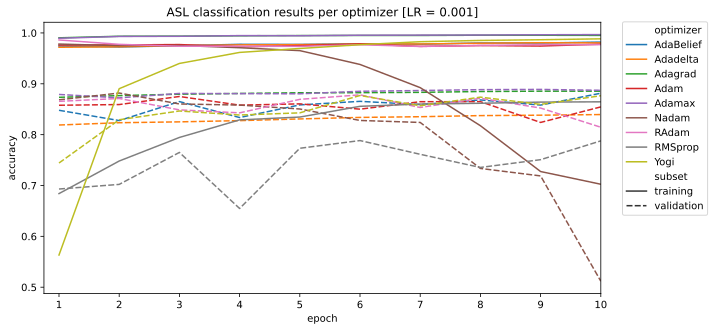

In [60]:
df = df.rename(columns={'acc': 'training', 'val_acc': 'validation'})
molten = df.melt(id_vars=['epoch', 'optimizer', 'experiment'],
                 var_name='subset',
                 value_vars=['training', 'validation'],
                 value_name='accuracy')\
             .sort_values('optimizer')
molten = molten[~(molten['optimizer'] == 'SGD')]
molten['epoch'] = molten['epoch'] + 1
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=molten, x='epoch', y='accuracy',
            hue='optimizer', style='subset', ax=ax)
ax.legend(bbox_to_anchor=(1.03, 1.02))
plt.xticks(np.arange(11))
plt.xlim(0.75, 10)
plt.title('ASL classification results per optimizer [LR = 0.001]')

<AxesSubplot:xlabel='epoch', ylabel='epoch_time'>

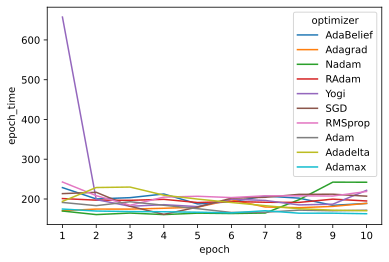

In [61]:
plt.xticks(np.arange(11))
df['epoch']=df['epoch']+1
sns.lineplot(data=df, x='epoch', y='epoch_time', hue='optimizer')

Old experiments

Group experiments by job id's

In [13]:
experiments = {
# partition: gpu. 15 hr time limit
    # '18102942': '0.001 LR, Logit + Shuffle bug',
    # '18105570': '0.001 LR, Logit + Shuffle bug',
# partition: gpu. cancelled at 5hr mark
    # '18126401': '0.005 LR, Shuffle bug',
# partition: gpushort. 1:30hr spent
    # '18144187': '0.005 LR, no bugs',
# partition: gpu. 10hr time limit
    '18144207': '0.005 LR',
# partition: gpushort. 2hr time limit
    '18149074': '0.001 LR, ImageNet weights',
# partition: gpushort. 2hr time limit
    '18152456': '0.002 LR, 26.000 samples, batch size 128',
    'kaggle': '0.001 LR, asl_alphabet_train'
}

Combine all results data

In [14]:
models = '../models'
def get_data(model_dir):
    try:
        data  = pd.read_csv(join(model_dir, 'epoch_loss.csv'))
        optim = pd.read_csv(join(model_dir, 'optimizer.csv'))
    except:
        return None
    data['model_dir'] = model_dir
    data['optimizer']     = optim['name'].values[0]
    data['learning_rate'] = optim['learning_rate'].values[0]
    return data

paths = [join(models, path) for path in os.listdir(models)]
jobs = filter(isdir, paths)
df = pd.concat(map(get_data, jobs))
df['job_id'] = df['model_dir'].str.extract(r'.*/(.*)_[0-9]+')
df['experiment'] = df['job_id'].map(experiments.get)
df

,epoch,accuracy,categorical_accuracy,epoch_time,loss,top_k_categorical_accuracy,val_accuracy,val_categorical_accuracy,val_loss,val_top_k_categorical_accuracy,model_dir,optimizer,learning_rate,job_id,experiment
0,0,0.960651,0.960651,1187.640418,0.145986,0.998803,0.220177,0.220177,13.694115,0.228467,../models/18089307_4,Nadam,0.001,18089307,None
1,1,0.961517,0.961517,1089.068708,0.138320,0.999613,0.230705,0.230705,13.378916,0.230705,../models/18089307_4,Nadam,0.001,18089307,None
2,2,0.961213,0.961213,1099.932372,0.151486,0.999926,0.230705,0.230705,11.557586,0.230705,../models/18089307_4,Nadam,0.001,18089307,None
3,3,0.960577,0.960577,1099.001507,0.168548,1.000000,0.230705,0.230705,11.017899,0.230705,../models/18089307_4,Nadam,0.001,18089307,None
4,4,0.959988,0.959988,1097.658838,0.181303,0.999926,0.230705,0.230705,12.613845,0.230705,../models/18089307_4,Nadam,0.001,18089307,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,7,1.000000,1.000000,401.627995,0.000049,1.000000,0.042195,0.042195,5.549690,0.196386,../models/18152456_8,AdaBeliefOptimizer,0.002,18152456,"0.002 LR, 26.000 samples, batch size 128"
8,8,1.000000,1.000000,401.153406,0.000050,1.000000,0.042610,0.042610,5.591049,0.196717,../models/18152456_8,AdaBeliefOptimizer,0.002,18152456,"0.002 LR, 26.000 samples, batch size 128"
9,9,1.000000,1.000000,402.199948,0.000053,1.000000,0.041946,0.041946,5.797457,0.197132,../models/18152456_8,AdaBeliefOptimizer,0.002,18152456,"0.002 LR, 26.000 samples, batch size 128"
10,10,1.000000,1.000000,402.124973,0.000057,1.000000,0.040869,0.040869,5.921118,0.194976,../models/18152456_8,AdaBeliefOptimizer,0.002,18152456,"0.002 LR, 26.000 samples, batch size 128"


In [15]:
df.groupby(['experiment', 'optimizer', 'learning_rate'])\
  .agg({
      'epoch': 'max',
      'epoch_time': 'mean',
      'accuracy': 'max',
      'val_accuracy': 'max'
   })

epoch  \
experiment                               optimizer          learning_rate          
0.001 LR, ImageNet weights               Adadelta           0.001             69   
                                         Adagrad            0.001             65   
                                         Adam               0.001             70   
                                         Adamax             0.001             72   
                                         Nadam              0.001             66   
                                         RMSprop            0.001             66   
0.002 LR, 26.000 samples, batch size 128 AdaBeliefOptimizer 0.002             11   
                                         RMSprop            0.002             11   
0.005 LR                                 AdaBeliefOptimizer 0.005             44   
                                         Adadelta           0.005             26   
                                         Adagrad            0.005             79   
                                         Adam               0.005             78   
                                         Adamax             0.005             77   
                                         Ftrl               0.005             75   
                                         Nadam              0.005             73   
                                         RMSprop            0.005             77   
                                         SGD                0.005             77   

                                                                            epoch_time  \
experiment                               optimizer          learning_rate                
0.001 LR, ImageNet weights               Adadelta           0.001           101.109414   
                                         Adagrad            0.001           107.489349   
                                         Adam               0.001            99.658234   
                                         Adamax             0.001            96.696365   
                                         Nadam              0.001           105.614728   
                                         RMSprop            0.001           105.553262   
0.002 LR, 26.000 samples, batch size 128 AdaBeliefOptimizer 0.002           574.731797   
                                         RMSprop            0.002           550.288665   
0.005 LR                                 AdaBeliefOptimizer 0.005           544.395638   
                                         Adadelta           0.005          1287.715603   
                                         Adagrad            0.005           443.105158   
                                         Adam               0.005           450.070848   
                                         Adamax             0.005           455.344112   
                                         Ftrl               0.005           468.672153   
                                         Nadam              0.005           483.113526   
                                         RMSprop            0.005           452.374973   
                                         SGD                0.005           459.699117   

                                                                           accuracy  \
experiment                               optimizer          learning_rate             
0.001 LR, ImageNet weights               Adadelta           0.001          0.980639   
                                         Adagrad            0.001          0.996859   
                                         Adam               0.001          0.998462   
                                         Adamax             0.001          1.000000   
                                         Nadam              0.001          0.998535   
                                         RMSprop            0.001          0.979699   
0.002 LR, 26.000 samples, batch size 128 AdaBeliefOptimizer 0.002      

In [16]:
molten = df.melt(id_vars=['epoch', 'optimizer', 'experiment'],
                 var_name='metric',
                 value_vars=['accuracy', 'val_accuracy'],
                 value_name='value')\
             .sort_values('optimizer')
molten

,epoch,optimizer,experiment,metric,value
2099,11,AdaBeliefOptimizer,"0.002 LR, 26.000 samples, batch size 128",accuracy,1.000000
1711,28,AdaBeliefOptimizer,0.005 LR,accuracy,0.995570
1712,29,AdaBeliefOptimizer,0.005 LR,accuracy,0.995045
1713,30,AdaBeliefOptimizer,0.005 LR,accuracy,0.994400
1714,31,AdaBeliefOptimizer,0.005 LR,accuracy,0.995330
...,...,...,...,...,...
3696,84,SGD,None,val_accuracy,0.000000
3697,85,SGD,None,val_accuracy,0.000000
3698,86,SGD,None,val_accuracy,0.000000
3692,80,SGD,None,val_accuracy,0.000000


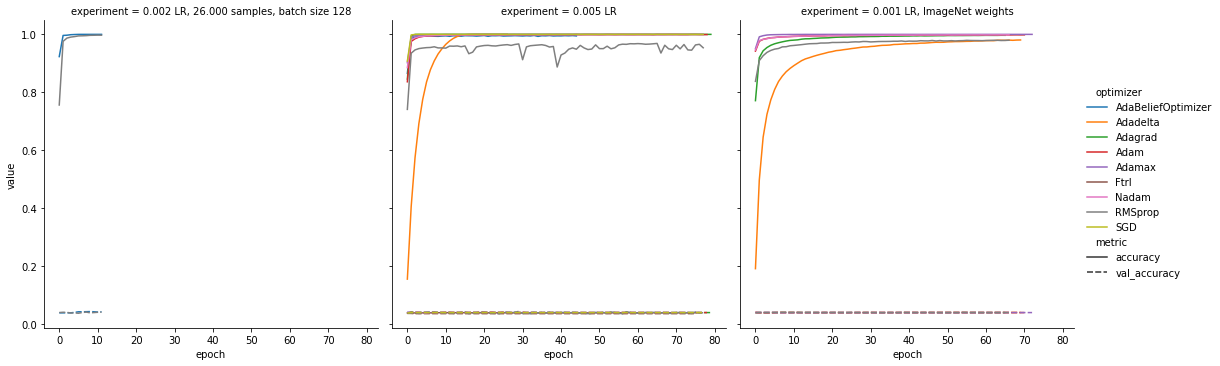

In [17]:
sns.relplot(data=molten, x='epoch', y='value',
    hue='optimizer', kind='line',
    style='metric', col='experiment',
    facet_kws={'sharey': True, 'sharex': True})